<a href="https://colab.research.google.com/github/ilyafaqir/RLM_Insurance_Prediction_R/blob/main/RLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("caret")
install.packages("GGally")
install.packages("car")
install.packages("gridExtra")
install.packages("lmtest")

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df <- read.csv("insurance.csv")
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [ ]:
summary(df)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

** Compter les valeurs manquantes**

In [ ]:
na_counts <- colSums(is.na(df))
data.frame(Colonne = names(na_counts), nmb_colone_vide = na_counts)



,Colonne,nmb_colone_vide
,<chr>,<dbl>
age,age,0
sex,sex,0
bmi,bmi,0
children,children,0
smoker,smoker,0
region,region,0
charges,charges,0


In [ ]:
df$sex <- as.factor(df$sex)
df$smoker <- as.factor(df$smoker)
df$region <- as.factor(df$region)

## ***visualiser la fréquence de toutes les variables :***

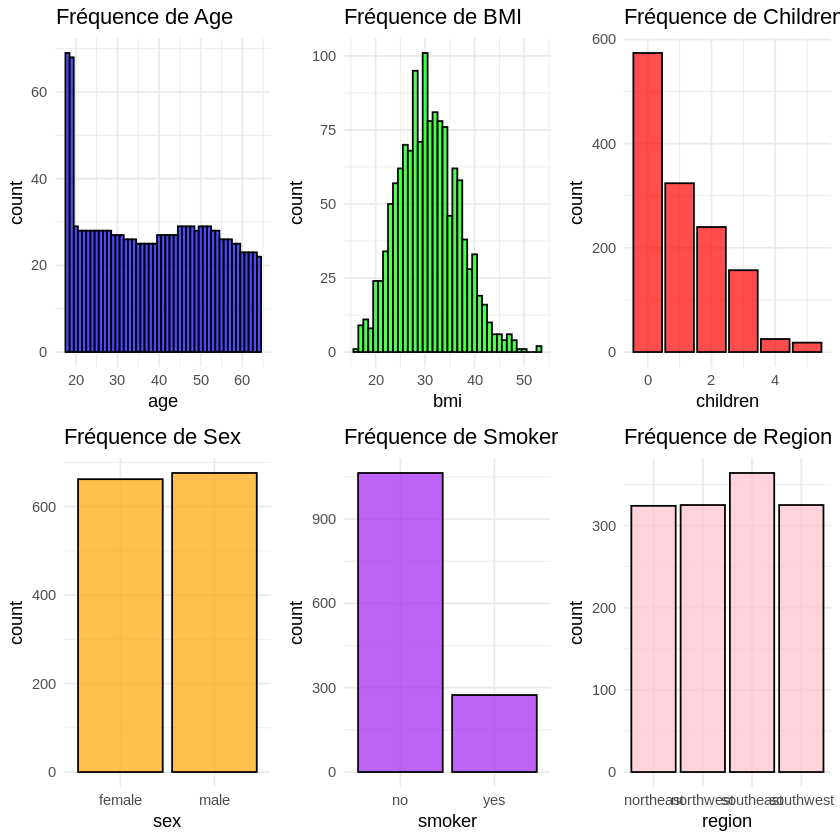

In [ ]:
library(ggplot2)
library(gridExtra)


plot1 <- ggplot(df, aes(x = age)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  ggtitle("Fréquence de Age") +
  theme_minimal()


plot2 <- ggplot(df, aes(x = bmi)) +
  geom_histogram(binwidth = 1, fill = "green", color = "black", alpha = 0.7) +
  ggtitle("Fréquence de BMI") +
  theme_minimal()

plot3 <- ggplot(df, aes(x = children)) +
  geom_bar(fill = "red", color = "black", alpha = 0.7) +
  ggtitle("Fréquence de Children") +
  theme_minimal()


plot4 <- ggplot(df, aes(x = sex)) +
  geom_bar(fill = "orange", color = "black", alpha = 0.7) +
  ggtitle("Fréquence de Sex") +
  theme_minimal()

 plot5 <- ggplot(df, aes(x = smoker)) +
  geom_bar(fill = "purple", color = "black", alpha = 0.7) +
  ggtitle("Fréquence de Smoker") +
  theme_minimal()

 plot6 <- ggplot(df, aes(x = region)) +
  geom_bar(fill = "pink", color = "black", alpha = 0.7) +
  ggtitle("Fréquence de Region") +
  theme_minimal()

 grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, ncol = 3)


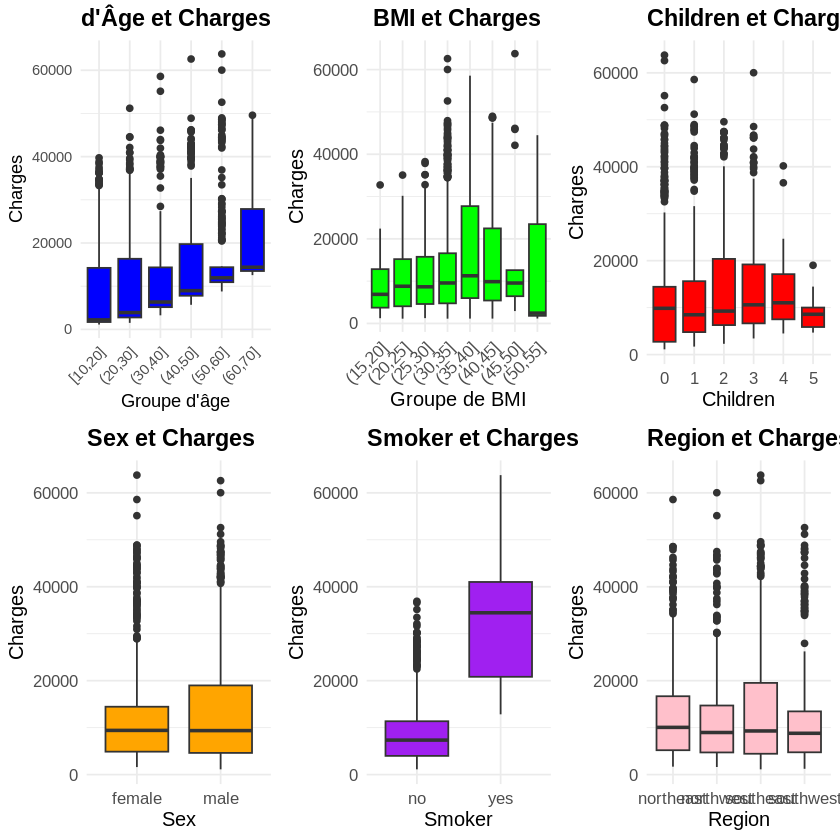

In [ ]:
 library(ggplot2)
library(gridExtra)


 plot1 <- ggplot(df, aes(x = cut(age, breaks = seq(10, 100, by = 10), include.lowest = TRUE), y = charges)) +
  geom_boxplot(fill = "blue") +
  ggtitle("d'Âge et Charges") +
  theme_minimal() +
  xlab("Groupe d'âge") + ylab("Charges") +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )


 plot2 <- ggplot(df, aes(x = cut(bmi, breaks = seq(10, 55, by = 5), include.lowest = TRUE), y = charges)) +
  geom_boxplot(fill = "green") +
  ggtitle(" BMI et Charges") +
  theme_minimal() +
  xlab("Groupe de BMI") + ylab("Charges") +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
    axis.text.y = element_text(size = 10)
  )


plot3 <- ggplot(df, aes(x = as.factor(children), y = charges)) +
  geom_boxplot(fill = "red") +
  ggtitle("Children et Charges") +
  theme_minimal() +
  xlab("Children") + ylab("Charges") +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    axis.text.x = element_text(size = 10),
    axis.text.y = element_text(size = 10)
  )

plot4 <- ggplot(df, aes(x = sex, y = charges)) +
  geom_boxplot(fill = "orange") +
  ggtitle("Sex et Charges") +
  theme_minimal() +
  xlab("Sex") + ylab("Charges") +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    axis.text.x = element_text(size = 10),
    axis.text.y = element_text(size = 10)
  )


plot5 <- ggplot(df, aes(x = smoker, y = charges)) +
  geom_boxplot(fill = "purple") +
  ggtitle("Smoker et Charges") +
  theme_minimal() +
  xlab("Smoker") + ylab("Charges") +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    axis.text.x = element_text(size = 10),
    axis.text.y = element_text(size = 10)
  )


plot6 <- ggplot(df, aes(x = region, y = charges)) +
  geom_boxplot(fill = "pink") +
  ggtitle("Region et Charges") +
  theme_minimal() +
  xlab("Region") + ylab("Charges") +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    axis.text.x = element_text(size = 10),
    axis.text.y = element_text(size = 10)
  )

grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6,
             ncol = 3,
             widths = c(1, 1, 1),
             heights = c(1, 1),
             padding = unit(120, "line"))

In [ ]:
data<-df
if (is.data.frame(data)) {
  data$country <- NULL
} else {
  stop("L'objet 'data' n'est pas un dataframe.")
}
data_new <- data[, c("age", "bmi", "sex", "smoker","charges")]
data_new$sex <- ifelse(data_new$sex == "male", 1, 0)
data_new$smoker <- ifelse(data_new$smoker == "yes", 1, 0)
head(data_new)

,age,bmi,sex,smoker,charges
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,27.900,0,1,16884.924
2,18,33.770,1,0,1725.552
3,28,33.000,1,0,4449.462
4,33,22.705,1,0,21984.471
5,32,28.880,1,0,3866.855
6,31,25.740,0,0,3756.622


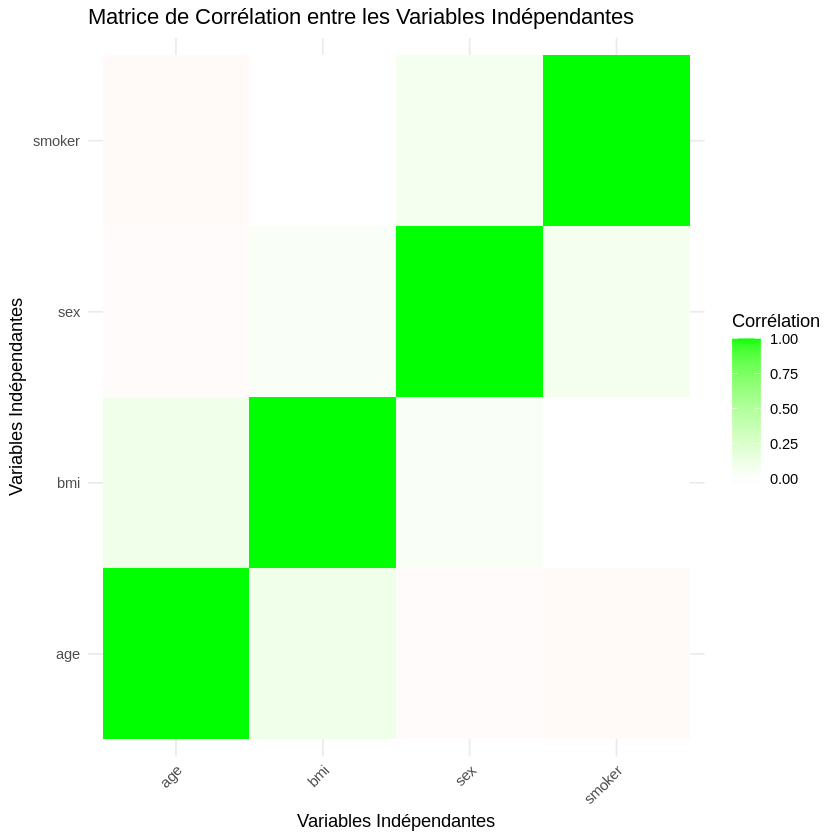

In [ ]:
library(ggplot2)
library(reshape2)
library(RColorBrewer)
independent_vars <- data_new[, c("age", "bmi", "sex", "smoker")]

cor_matrix <- cor(independent_vars, use = "complete.obs")

# Convertir la matrice de corrélation en format long pour ggplot
cor_matrix_melted <- melt(cor_matrix)

# Créer la heatmap
ggplot(cor_matrix_melted, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "red", high = "green", mid = "white", midpoint = 0) +
  theme_minimal() +
  labs(title = "Matrice de Corrélation entre les Variables Indépendantes",
       x = "Variables Indépendantes", y = "Variables Indépendantes", fill = "Corrélation") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


**standariser dataset**

In [ ]:

data_new$age <- scale(data_new$age)
data_new$bmi <- scale(data_new$bmi)
 head(data_new)


,age,bmi,sex,smoker,charges
,"<dbl[,1]>","<dbl[,1]>",<dbl>,<dbl>,<dbl>
1,-1.4382265,-0.4531506,0,1,16884.924
2,-1.5094011,0.5094306,1,0,1725.552
3,-0.7976553,0.3831636,1,0,4449.462
4,-0.4417824,-1.3050431,1,0,21984.471
5,-0.5129570,-0.2924471,1,0,3866.855
6,-0.5841316,-0.8073542,0,0,3756.622


**divise data set**

In [ ]:
 library(caret)

 set.seed(123)


train_index <- createDataPartition(data_new$charges, p = 0.8, list = FALSE)


train_data <- data_new[train_index, ]
test_data <- data_new[-train_index, ]


In [ ]:

model_multiple <- lm(charges ~ age + bmi + sex + smoker, data = train_data)

summary(model_multiple)



Call:
lm(formula = charges ~ age + bmi + sex + smoker, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12735.2  -2955.9   -921.1   1547.2  28799.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8329.0      274.2  30.370   <2e-16 ***
age           3507.4      186.3  18.823   <2e-16 ***
bmi           1924.5      186.4  10.323   <2e-16 ***
sex           -103.0      370.3  -0.278    0.781    
smoker       24217.2      456.3  53.070   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6035 on 1067 degrees of freedom
Multiple R-squared:  0.7565,	Adjusted R-squared:  0.7556 
F-statistic: 828.8 on 4 and 1067 DF,  p-value: < 2.2e-16


In [ ]:

predictions_test <- predict(model_multiple, newdata = test_data)

results <- data.frame(
  Observed = test_data$charges,
  Predicted = predictions_test
)
summary(predictions_test)

head(results)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -401.8  5579.8  9688.6 12908.8 14530.1 40870.8 

,Observed,Predicted
,<dbl>,<dbl>
5,3866.855,5864.088
9,6406.411,7412.082
14,11090.718,15410.820
19,10602.385,15459.340
25,6203.902,6842.460
28,12268.632,12937.920


In [ ]:
# Calcul du R^2
SS_tot <- sum((results$Observed - mean(results$Observed))^2)
SS_res <- sum((results$Observed - results$Predicted)^2)

R_squared <- 1 - (SS_res / SS_tot)
R_squared


[1] 0.7062025

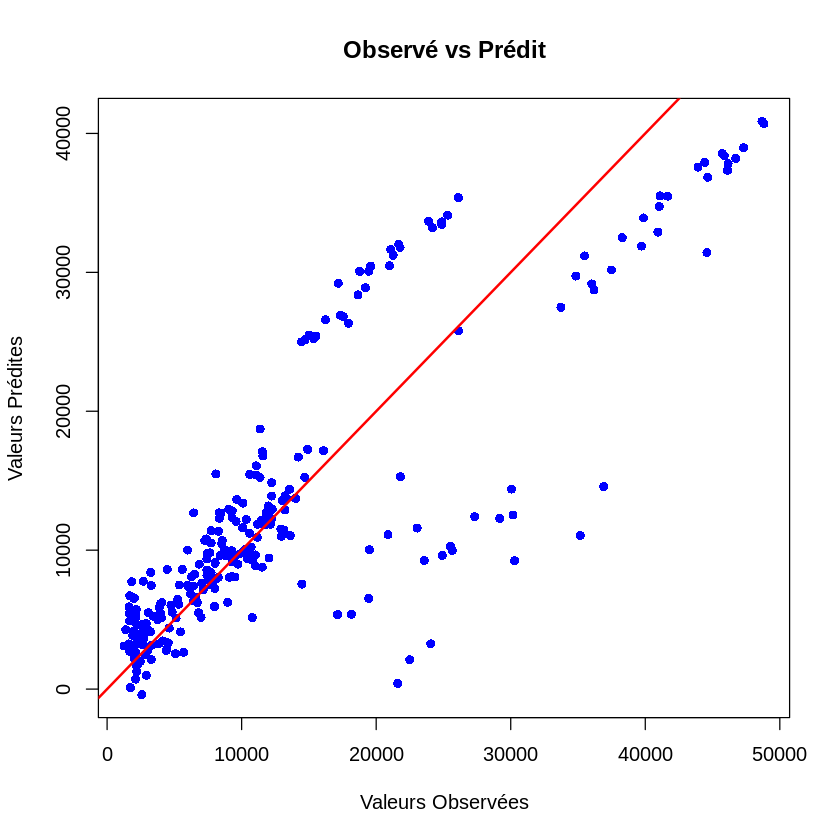

In [ ]:

plot(results$Observed, results$Predicted,
     main = "Observé vs Prédit",
     xlab = "Valeurs Observées",
     ylab = "Valeurs Prédites",
     col = "blue", pch = 16)

abline(0, 1, col = "red", lwd = 2)


**résidus**

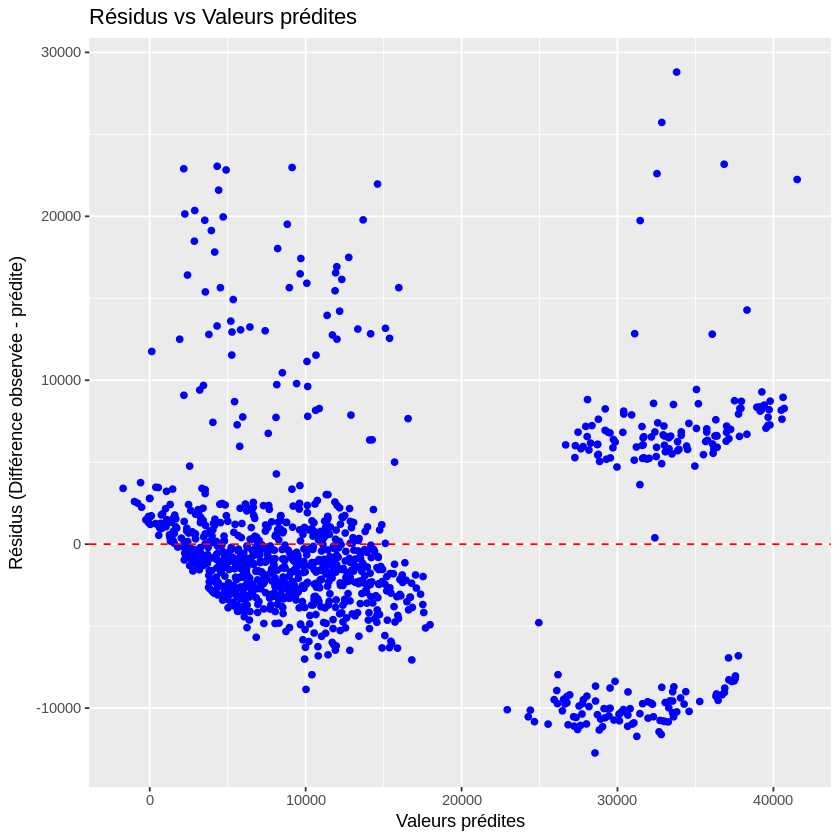

In [ ]:

ggplot(results, aes(x = Predicted, y = Difference)) +
  geom_point(color = "blue") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  ggtitle("Résidus vs Valeurs prédites") +
  xlab("Valeurs prédites") +
  ylab("Résidus (Différence observée - prédite)")




resudus

In [ ]:
  library(lmtest)

 dwtest(model_multiple)



	Durbin-Watson test

data:  model_multiple
DW = 2.0594, p-value = 0.8342
alternative hypothesis: true autocorrelation is greater than 0


Test de Durbin-Watson pour l'autocorrélation des résidus :

Le test de Durbin-Watson a été effectué pour vérifier l'indépendance des erreurs dans le modèle de régression multiple. La statistique de Durbin-Watson obtenue est de 2.0594, avec une valeur p associée de 0.8342.

Cette statistique indique qu'il n'y a pas d'autocorrélation significative des résidus. En effet, une valeur proche de 2 suggère une absence d'autocorrélation. De plus, le p-value élevé (supérieur à 0.05) confirme que l'hypothèse nulle (absence d'autocorrélation) ne peut pas être rejetée.

Ainsi, nous pouvons conclure que les erreurs dans ce modèle de régression sont indépendantes, ce qui est un bon signe pour la validité de la modélisation.

In [ ]:

library(car)
vif(model_multiple)


Loading required package: carData



age      bmi      sex   smoker 
1.015603 1.016829 1.008931 1.006408

Les résultats du test VIF montrent que le modèle de régression utilisé est solide en termes de multicolinéarité, et les variables indépendantes sont bien choisies sans problème majeur de corrélation. Vous pouvez donc poursuivre l'analyse en vous concentrant sur l'interprétation des coefficients et l'évaluation de la performance du modèle sans avoir à vous soucier de la multicolinéarité.